# Imports

In [1]:
import pandas as pd
import numpy as np

from joblib import dump, load

# Loading dataset

In [2]:
df = pd.read_csv('train_processed.csv', header=0)

In [3]:
ids = df.pop('id')

In [4]:
df.head()

,Episode_Length_minutes,Host_Popularity_percentage,Guest_Popularity_percentage,Number_of_Ads,Episode_Number,Genre_Business,Genre_Comedy,Genre_Education,Genre_Health,Genre_Lifestyle,...,Podcast_Embed_91,Podcast_Embed_92,Podcast_Embed_93,Podcast_Embed_94,Podcast_Embed_95,Podcast_Embed_96,Podcast_Embed_97,Podcast_Embed_98,Podcast_Embed_99,Listening_Time_minutes
0,-3.477432e-16,0.653611,-3.004898e-16,-1.171766,1.657582,-0.346806,-0.34905,-0.264675,-0.324411,-0.351468,...,0.418261,-0.776574,-0.088732,0.567832,1.608396,0.484065,-0.149683,-0.924076,-0.285117,-0.516518
1,1.677160e+00,0.309976,8.334811e-01,0.565657,-0.906009,-0.346806,2.86492,-0.264675,-0.324411,-0.351468,...,0.749341,-0.935100,1.541608,0.168647,-0.951429,1.436345,0.634674,-0.250853,1.070425,1.568817
2,2.849676e-01,0.442009,-1.520724e+00,-1.171766,-1.262063,-0.346806,-0.34905,3.778220,-0.324411,-0.351468,...,-1.144233,-0.343991,1.651599,1.014901,1.670312,-0.472468,0.188194,-0.561836,-0.927021,-0.018870
3,8.084003e-02,-0.115415,9.301377e-01,0.565657,-0.229506,-0.346806,-0.34905,-0.264675,-0.324411,-0.351468,...,2.008528,0.215965,-1.791090,-0.224865,-1.339929,1.635518,-1.438292,0.806239,1.025922,0.030983
4,1.395385e+00,0.883576,2.264772e-01,1.434369,1.230317,-0.346806,-0.34905,-0.264675,3.082507,-0.351468,...,-1.199357,0.397337,2.063115,0.832813,0.878584,-0.762942,-0.919263,0.138794,-0.570716,1.111820


# Separando as bases de treino e teste

In [5]:
train = df.sample(frac=0.75, random_state=0)
test = df.drop(train.index)

In [6]:
x_train = train
y_train = train.pop('Listening_Time_minutes')

In [7]:
print(x_train.shape)
x_train.head(5)

(562500, 129)


,Episode_Length_minutes,Host_Popularity_percentage,Guest_Popularity_percentage,Number_of_Ads,Episode_Number,Genre_Business,Genre_Comedy,Genre_Education,Genre_Health,Genre_Lifestyle,...,Podcast_Embed_90,Podcast_Embed_91,Podcast_Embed_92,Podcast_Embed_93,Podcast_Embed_94,Podcast_Embed_95,Podcast_Embed_96,Podcast_Embed_97,Podcast_Embed_98,Podcast_Embed_99
629436,-1.027454e+00,-1.134517,-2.223613e-01,-0.303054,-1.724934,2.883460,-0.34905,-0.264675,-0.324411,-0.351468,...,0.626289,-0.286291,0.091187,-0.343969,0.366109,0.887332,0.406226,0.089579,0.627817,-0.008211
525015,-3.477432e-16,0.461682,-7.098624e-01,1.434369,-1.724934,-0.346806,-0.34905,-0.264675,-0.324411,-0.351468,...,0.791957,0.280409,-0.677255,-1.675407,-0.554471,-1.180162,-0.268244,-0.386334,-0.121098,0.052192
114041,1.007149e+00,-1.626362,-1.704547e+00,1.434369,-0.229506,-0.346806,-0.34905,-0.264675,-0.324411,-0.351468,...,1.705731,0.904423,1.236548,-1.009606,-1.494288,0.594588,1.743633,-1.714020,0.935636,2.061493
523286,-2.543174e-01,-1.475092,-1.350257e+00,-1.171766,1.443949,2.883460,-0.34905,-0.264675,-0.324411,-0.351468,...,0.072314,1.057136,0.260459,-2.003673,0.691439,1.927132,0.400299,0.576367,1.485932,0.562999
613265,3.477528e-01,1.243824,-3.004898e-16,-1.171766,-1.546907,-0.346806,-0.34905,-0.264675,3.082507,-0.351468,...,0.776517,-2.032318,2.230480,-1.063394,-2.134288,-0.927237,-0.526594,-0.770026,-0.076131,-1.791080


In [8]:
print(y_train.shape)
y_train.head(5)

(562500,)


629436   -1.121337
525015   -0.099715
114041    0.335445
523286   -0.522858
613265    0.858139
Name: Listening_Time_minutes, dtype: float64

# Construindo o Modelo

## Imports and GPU config

In [9]:
from tensorflow.keras.layers import TimeDistributed, Dense, Input, Lambda, BatchNormalization, Concatenate, Conv1D, ZeroPadding1D
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf

print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

# Configurando para não alocar diretamente toda a memória da GPU (alocar conforme necessário)
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)  # Aloca memória conforme necessário
    except RuntimeError as e:
        print(e)

2025-04-22 23:05:30.761629: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-04-22 23:05:30.796970: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-04-22 23:05:30.797014: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-04-22 23:05:30.797044: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-04-22 23:05:30.805006: I tensorflow/core/platform/cpu_feature_g

Num GPUs Available:  1


2025-04-22 23:05:32.867818: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2025-04-22 23:05:32.911060: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2025-04-22 23:05:32.911267: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

## Definição do modelo

2025-04-22 23:05:32.946907: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2025-04-22 23:05:32.947219: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2025-04-22 23:05:32.947384: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

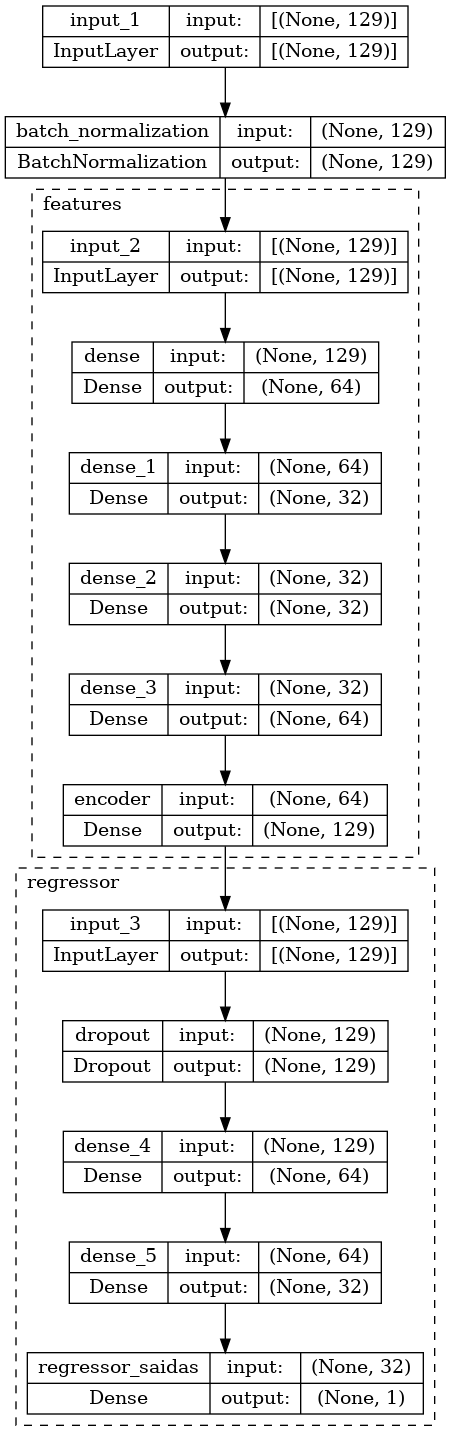

In [10]:
def extrator_features(input_dims, activation, bias):
  input_layer = Input(shape=[input_dims])

  x_0 = Dense(int(input_dims/2), activation=activation, use_bias=bias, kernel_regularizer=None)(input_layer)
  x_1 = Dense(int(input_dims/4), activation=activation, use_bias=bias)(x_0)
  x_3 = Dense(int(input_dims/4), activation=activation, use_bias=bias)(x_1)
  x_4 = Dense(int(input_dims/2), activation=activation, use_bias=bias)(x_3)
  x_bottleneck = Dense(int(input_dims), activation=activation, name='encoder', use_bias=bias, kernel_regularizer=None)(x_4)

  return Model(input_layer, x_bottleneck, name="features")

def regressor(input_dims, output_dims, activation, bias):
  input_layer = Input(shape=[input_dims])

  x_d = tf.keras.layers.Dropout(0.2)(input_layer)
  x_0 = Dense(int(input_dims/2), activation=activation, use_bias=bias, kernel_regularizer=None)(x_d)
  x_2 = Dense(int(input_dims/4), activation=activation, use_bias=bias)(x_0)
  saidas = Dense(output_dims, activation=None, name='regressor_saidas', use_bias=bias)(x_2)

  return Model(input_layer, saidas, name="regressor")

def build_models(input_dims, output_dims, activation, bias):
  # Camadas de entrada
  input_layer = Input(shape=[input_dims])

  x_n = BatchNormalization()(input_layer)

  # Kernels
  extrator = extrator_features(input_dims, activation, bias)

  # Features
  features = extrator(x_n)

  # Regressão
  regressao = regressor(features.shape[1], output_dims, activation, bias)

  saida = regressao(features)
  
  return (
      Model(input_layer, saida, name="regressao"),
      Model(input_layer, features, name="projecao")
  )

model, features = build_models(x_train.shape[1], 1, 'elu', True)
model.compile(optimizer='adamax', loss='mse', metrics=['mae', 'mse'])
plot_model(model, show_shapes=True, expand_nested=True)

## Treinando o modelo

In [11]:
# Callback para recuperar o melhor peso, e parar quando ficar três épocas sem melhora
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Treinando o modelo
history = model.fit(x_train, y_train, epochs=20, validation_split = 0.2, callbacks=[callback], batch_size=512)

Epoch 1/20


2025-04-22 23:05:41.235360: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7f6a91a048e0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2025-04-22 23:05:41.235392: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce GTX 1650, Compute Capability 7.5
2025-04-22 23:05:41.239436: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-04-22 23:05:41.270234: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:442] Loaded cuDNN version 8907
2025-04-22 23:05:41.356975: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


879/879 [==============================] - 9s 6ms/step - loss: 0.2925 - mae: 0.4036 - mse: 0.2925 - val_loss: 0.2494 - val_mae: 0.3681 - val_mse: 0.2494
Epoch 2/20
879/879 [==============================] - 5s 6ms/step - loss: 0.2531 - mae: 0.3727 - mse: 0.2531 - val_loss: 0.2455 - val_mae: 0.3640 - val_mse: 0.2455
Epoch 3/20
879/879 [==============================] - 5s 5ms/step - loss: 0.2494 - mae: 0.3687 - mse: 0.2494 - val_loss: 0.2432 - val_mae: 0.3619 - val_mse: 0.2432
Epoch 4/20
879/879 [==============================] - 5s 6ms/step - loss: 0.2479 - mae: 0.3671 - mse: 0.2479 - val_loss: 0.2414 - val_mae: 0.3607 - val_mse: 0.2414
Epoch 5/20
879/879 [==============================] - 5s 6ms/step - loss: 0.2465 - mae: 0.3656 - mse: 0.2465 - val_loss: 0.2400 - val_mae: 0.3582 - val_mse: 0.2400
Epoch 6/20
879/879 [==============================] - 5s 6ms/step - loss: 0.2457 - mae: 0.3648 - mse: 0.2457 - val_loss: 0.2396 - val_mae: 0.3584 - val_mse: 0.2396
Epoch 7/20
879/879 [=======

## Analysing error metrics

In [12]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist['rmse'] = np.sqrt(hist['mse'])
hist['val_rmse'] = np.sqrt(hist['val_mse'])
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch,rmse,val_rmse
15,0.242139,0.361271,0.242139,0.239541,0.357834,0.239541,15,0.492076,0.489429
16,0.241712,0.360846,0.241712,0.238940,0.357092,0.238940,16,0.491642,0.488814
17,0.241375,0.360585,0.241375,0.238943,0.357397,0.238943,17,0.491299,0.488818
18,0.241393,0.360538,0.241393,0.237315,0.355704,0.237315,18,0.491318,0.487150
19,0.241296,0.360533,0.241296,0.237115,0.355996,0.237115,19,0.491219,0.486944


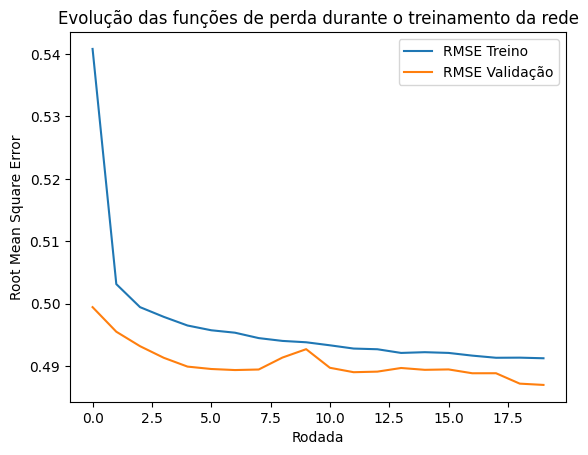

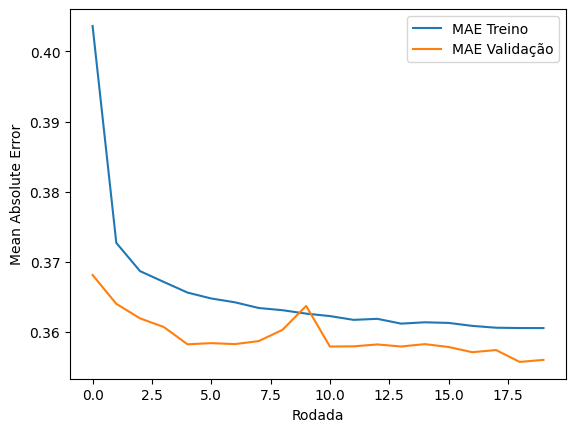

In [13]:
import matplotlib.pyplot as plt

plt.figure()
plt.title("Evolução das funções de perda durante o treinamento da rede")
plt.xlabel('Rodada')
plt.ylabel('Root Mean Square Error')
plt.plot(hist['epoch'], hist['rmse'], label='RMSE Treino')
plt.plot(hist['epoch'], hist['val_rmse'], label = 'RMSE Validação')
plt.legend()

plt.figure()
plt.xlabel('Rodada')
plt.ylabel('Mean Absolute Error')
plt.plot(hist['epoch'], hist['mae'], label='MAE Treino')
plt.plot(hist['epoch'], hist['val_mae'], label = 'MAE Validação')
plt.legend()

plt.show()

## Evaluating the model

### Preparing test dataframe

In [14]:
x_test = test
y_test = test.pop('Listening_Time_minutes')
print(x_test.shape)
x_test.head(5)

(187500, 129)


,Episode_Length_minutes,Host_Popularity_percentage,Guest_Popularity_percentage,Number_of_Ads,Episode_Number,Genre_Business,Genre_Comedy,Genre_Education,Genre_Health,Genre_Lifestyle,...,Podcast_Embed_90,Podcast_Embed_91,Podcast_Embed_92,Podcast_Embed_93,Podcast_Embed_94,Podcast_Embed_95,Podcast_Embed_96,Podcast_Embed_97,Podcast_Embed_98,Podcast_Embed_99
1,1.677160,0.309976,8.334811e-01,0.565657,-0.906009,-0.346806,2.86492,-0.264675,-0.324411,-0.351468,...,-1.514966,0.749341,-0.935100,1.541608,0.168647,-0.951429,1.436345,0.634674,-0.250853,1.070425
4,1.395385,0.883576,2.264772e-01,1.434369,1.230317,-0.346806,-0.34905,-0.264675,3.082507,-0.351468,...,-0.287775,-1.199357,0.397337,2.063115,0.832813,0.878584,-0.762942,-0.919263,0.138794,-0.570716
15,0.116024,0.676345,1.429238e+00,-1.171766,-0.158295,-0.346806,-0.34905,-0.264675,-0.324411,-0.351468,...,0.169648,0.433356,-1.973291,0.919960,-1.271505,0.986772,0.346645,0.958411,0.850991,-0.181684
16,0.423580,-0.481785,-3.004898e-16,0.565657,1.087895,-0.346806,-0.34905,3.778220,-0.324411,-0.351468,...,-0.791153,-1.144233,-0.343991,1.651599,1.014901,1.670312,-0.472468,0.188194,-0.561836,-0.927021
22,0.052026,0.128977,1.287240e+00,-1.171766,0.090943,2.883460,-0.34905,-0.264675,-0.324411,-0.351468,...,0.072314,1.057136,0.260459,-2.003673,0.691439,1.927132,0.400299,0.576367,1.485932,0.562999


In [15]:
scaler_y = load('scaler_y.joblib')
y_test = scaler_y.inverse_transform(y_test.values.reshape(-1, 1))

In [16]:
print(y_test)

[[88.01241]
 [75.61031]
 [63.97718]
 ...
 [61.16847]
 [56.87058]
 [15.26   ]]


### Running prediction

In [17]:
y_pred = model.predict(x_test)
y_pred = scaler_y.inverse_transform(y_pred.reshape(-1, 1))
print(y_pred)

5860/5860 [==============================] - 10s 2ms/step
[[86.90361 ]
 [73.84213 ]
 [47.454517]
 ...
 [85.66584 ]
 [53.736023]
 [18.228842]]


### Calculating error metrics

In [18]:
mse = tf.keras.losses.MSE(y_test, y_pred).numpy().mean()
mae = tf.keras.losses.MAE(y_test, y_pred).numpy().mean()
rmse = np.sqrt(mse)

In [19]:
print(f"RMSE Test: {rmse}")
print(f"MSE Test: {mse}")
print(f"MAE Test: {mae}")

RMSE Test: 13.256901741027832
MSE Test: 175.74545288085938
MAE Test: 9.681464195251465


## Saving the model

In [20]:
model.save('model.keras')
features.save('features.keras')
dump(model, 'model.joblib')
dump(features, 'features.joblib')

['features.joblib']

# Making the submission file

## Loading the test dataset

In [21]:
import numpy as np

# Caminho do arquivo GloVe
GLOVE_PATH = "glove.6B/glove.6B.100d.txt"  # por exemplo

# Carregar GloVe em memória
def load_glove_embeddings(glove_file_path):
    embeddings = {}
    with open(glove_file_path, 'r', encoding='utf8') as f:
        for line in f:
            parts = line.split()
            word = parts[0]
            vector = np.array(parts[1:], dtype='float32')
            embeddings[word] = vector
    return embeddings

# Função para vetorizar um título
def embed_title(title, embeddings, dim=100):
    words = title.lower().split()
    vectors = [embeddings[word] for word in words if word in embeddings]
    if not vectors:
        return np.zeros(dim)
    return np.mean(vectors, axis=0)

# Exemplo de uso
glove = load_glove_embeddings(GLOVE_PATH)
# vetor = embed_title("Smartphone com câmera ultrawide", glove)
# print(vetor.shape)  # (100,)

In [22]:
scaler = load('scaler.joblib')
imputer = load('imputer.joblib')

In [23]:
test_df = pd.read_csv('test.csv')
test_df.head()

,id,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment
0,750000,Educational Nuggets,Episode 73,78.96,Education,38.11,Saturday,Evening,53.33,1.0,Neutral
1,750001,Sound Waves,Episode 23,27.87,Music,71.29,Sunday,Morning,NaN,0.0,Neutral
2,750002,Joke Junction,Episode 11,69.10,Comedy,67.89,Friday,Evening,97.51,0.0,Positive
3,750003,Comedy Corner,Episode 73,115.39,Comedy,23.40,Sunday,Morning,51.75,2.0,Positive
4,750004,Life Lessons,Episode 50,72.32,Lifestyle,58.10,Wednesday,Morning,11.30,2.0,Neutral


In [24]:
# Separar o ID
test_ids_col = test_df.pop('id')

# Extrair o número do episódio e remover a coluna 'Episode_Title'
test_df['Episode_Number'] = test_df['Episode_Title'].str.extract(r'(\d+)').astype(int)
test_df = test_df.drop('Episode_Title', axis=1)

# Aplicar One Hot Encoding nas mesmas colunas
columns_to_one_hot = ['Genre', 'Publication_Day', 'Publication_Time', 'Episode_Sentiment']
test_df = pd.get_dummies(test_df, columns=columns_to_one_hot)

# Aplicar o embedding via GloVe na coluna 'Podcast_Name'
test_df['Podcast_Embedding'] = test_df['Podcast_Name'].apply(lambda x: embed_title(x, glove, dim=100))

# Expandir o embedding em múltiplas colunas
embedding_cols_test = pd.DataFrame(test_df['Podcast_Embedding'].tolist(),
                                   columns=[f'Podcast_Embed_{i}' for i in range(100)])
test_df = pd.concat([test_df, embedding_cols_test], axis=1)
test_df.drop(columns=['Podcast_Embedding'], inplace=True)

# Remover a coluna 'Podcast_Name'
test_df.drop(columns=['Podcast_Name'], inplace=True)

# Normalizar os dados
test_df = pd.DataFrame(scaler.transform(test_df), columns=test_df.columns)

# Adicionar uma coluna "Listening_Time_minutes" com valores fake 0
test_df['Listening_Time_minutes'] = 0

# Preencher valores NaN com o imputador
test_df = pd.DataFrame(imputer.transform(test_df), columns=test_df.columns)

# Remover a coluna fake "Listening_Time_minutes"
test_df.drop(columns=['Listening_Time_minutes'], inplace=True)

test_df.head()

,Episode_Length_minutes,Host_Popularity_percentage,Guest_Popularity_percentage,Number_of_Ads,Episode_Number,Genre_Business,Genre_Comedy,Genre_Education,Genre_Health,Genre_Lifestyle,...,Podcast_Embed_90,Podcast_Embed_91,Podcast_Embed_92,Podcast_Embed_93,Podcast_Embed_94,Podcast_Embed_95,Podcast_Embed_96,Podcast_Embed_97,Podcast_Embed_98,Podcast_Embed_99
0,0.438442,-0.950895,3.843600e-02,-0.303054,0.767446,-0.346806,-0.34905,3.778220,-0.324411,-0.351468,...,-1.136294,0.238342,-0.334171,-0.513947,-1.214106,-1.687950,0.081732,-0.306730,-0.585775,0.790164
1,-1.111168,0.499718,-3.004898e-16,-1.171766,-1.012825,-0.346806,-0.34905,-0.264675,-0.324411,-0.351468,...,-0.350458,0.077183,-1.679629,-0.241348,1.036780,0.857015,-2.739905,-0.192109,-0.408195,-1.792622
2,0.139379,0.351072,1.591269e+00,-1.171766,-1.440090,-0.346806,2.86492,-0.264675,-0.324411,-0.351468,...,-1.514966,0.749341,-0.935100,1.541608,0.168647,-0.951429,1.436345,0.634674,-0.250853,1.070425
3,1.543400,-1.594009,-1.709765e-02,0.565657,0.767446,-0.346806,2.86492,-0.264675,-0.324411,-0.351468,...,-0.505848,-0.466422,-0.781869,1.626556,-0.931723,0.241000,1.144218,0.894100,-0.811689,-0.252507
4,0.237045,-0.076942,-1.438829e+00,0.565657,-0.051479,-0.346806,-0.34905,-0.264675,-0.324411,2.845208,...,-0.605542,-0.309433,1.237021,0.878194,0.131925,-0.818589,-0.600924,-1.066097,-1.339897,0.428681


In [25]:
# Fazer a previsão
submission_pred = model.predict(test_df)

# Desnormalizar o resultado
submission_pred = scaler_y.inverse_transform(submission_pred.reshape(-1, 1))

# Criar o DataFrame de submissão
submission_df = pd.DataFrame({'id': test_ids_col, 'Listening_Time_minutes': submission_pred.flatten()})

submission_df.head()

7813/7813 [==============================] - 12s 2ms/step


,id,Listening_Time_minutes
0,750000,53.826977
1,750001,17.647812
2,750002,47.524616
3,750003,82.301636
4,750004,50.703766


In [26]:
# Salvar o DataFrame de submissão em um arquivo CSV
submission_df.to_csv('submission.csv', index=False)